Assignment 1  
Name: Miao LU  
NetID: ml6432

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as web
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('ggplot')

# Stock time series

## Download data

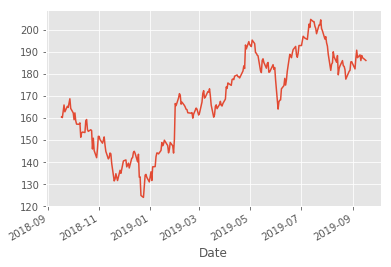

In [23]:
FBStock = web.DataReader(name="FB", data_source="yahoo",start="2018-09-15")
FBStock['Adj Close'].plot()

From the above graph, we can see there is a upward trend, but the seasonality is not appeared here.

## Calculate autocorrelation function

In [15]:
# calculate the observed auto correlation function
df=pd.Series(sm.tsa.acf(FBStock['Adj Close'], nlags=30))
df.head()

0    1.000000
1    0.984288
2    0.969194
3    0.954842
4    0.941231
dtype: float64

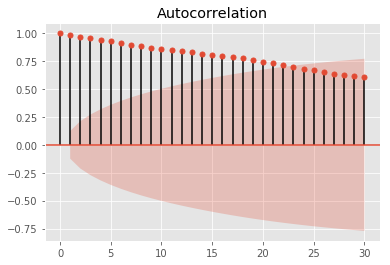

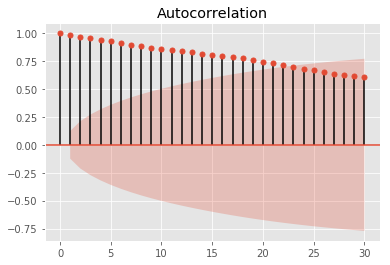

In [4]:
# calculate autocorrelation function
sm.graphics.tsa.plot_acf(FBStock['Adj Close'],lags=30)

## Detrend the data

### Linear regression

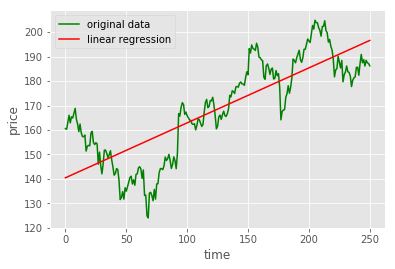

In [5]:
# linear regression
x=np.arange(len(FBStock))
y=FBStock['Adj Close']
linear_reg=np.polyfit(x,y,deg=1)
y_fit=np.polyval(linear_reg,x)
# plot the detrend data
plt.figure()
plt.plot(x,y,'g',label='original data')
plt.plot(x,y_fit,'r',label='linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('price')
plt.show()

### Detrend time series by using linear regression

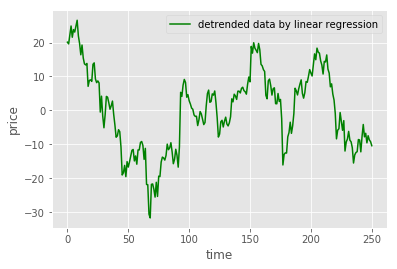

In [6]:
plt.plot(x,y-y_fit,'g',label='detrended data by linear regression')
plt.legend(loc=0)
plt.xlabel('time')
plt.ylabel('price')
plt.show()

###  Moving average function

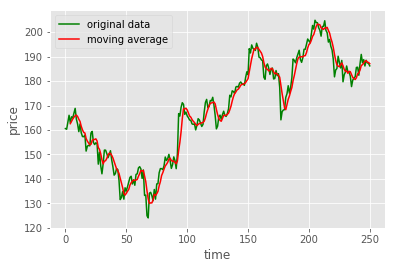

In [7]:
plt.plot(x,y,'g',label='original data')
# use 5 day moving average
MA=FBStock['Adj Close'].rolling(window=5).mean()
plt.plot(x,MA,'r',label='moving average')
plt.legend()
plt.xlabel('time')
plt.ylabel('price')
plt.show()

### Detrend time series by using moving average

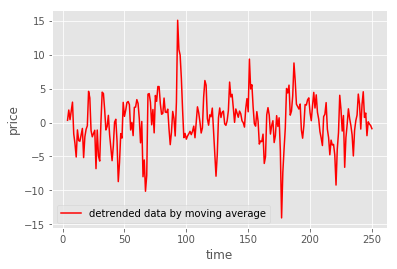

In [8]:
plt.plot(x,y-MA,'r',label='detrended data by moving average')
plt.legend()
plt.xlabel('time')
plt.ylabel('price')
plt.show()

# US Retail sales data

## Load data

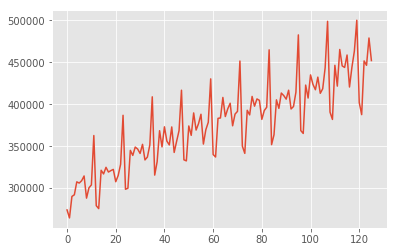

In [26]:
#load 10 year monthly retail sales data
path='../Assign1/RetailSales.csv'
retail_sales=pd.read_csv(path)
retail_sales=retail_sales.dropna()
retail_sales.value.astype(float).plot()

## Seasonal decompose

<function matplotlib.pyplot.show(*args, **kw)>

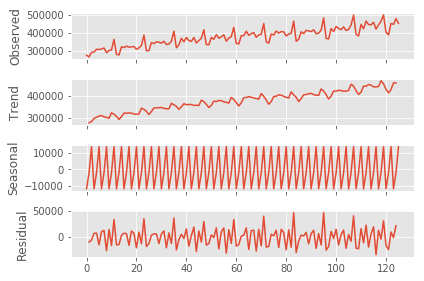

In [10]:
decompose=seasonal_decompose(retail_sales.value, model='Additive',freq=3)
decompose.plot()
plt.show

## Remove the seasonality of the data

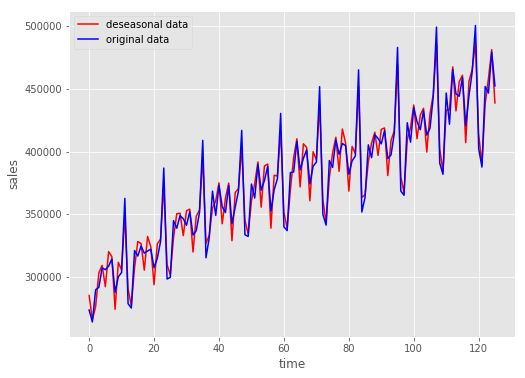

In [11]:
deseasoned=retail_sales.value-decompose.seasonal
X=np.arange(len(deseasoned))
plt.figure(figsize=(8,6))
plt.plot(X, retail_sales.value-decompose.seasonal,'r',label='deseasonal data')
plt.plot(X,retail_sales.value,'b',label='original data')
plt.legend()
plt.xlabel('time')
plt.ylabel('sales')
plt.show()

## Remove the trend of the data

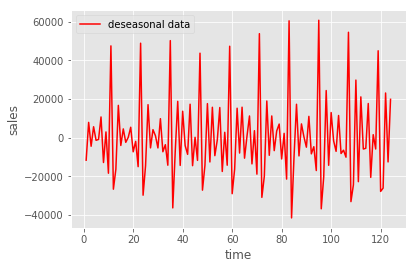

In [12]:
detrend=retail_sales.value-decompose.trend
X=np.arange(len(detrend))
plt.figure()
#plt.plot(X,retail_sales.value,'b',label='original data')
plt.plot(X, detrend,'r',label='deseasonal data')
plt.legend()
plt.xlabel('time')
plt.ylabel('sales')
plt.show()

## Remove inflation but using log of sales vs time in a linear regression

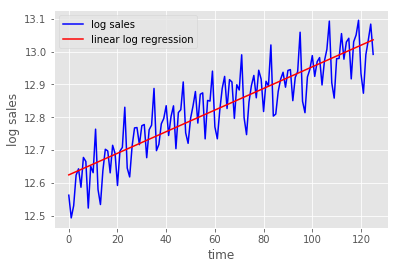

In [13]:
# linear regression of log sales vs time
log_sales=np.log(deseasoned)
linear_log_reg=np.polyfit(X,log_sales,deg=1)
y_fit=np.polyval(linear_log_reg,X)
plt.figure()
plt.plot(X,log_sales,'b',label='log sales')
plt.plot(X,y_fit,'r',label='linear log regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('log sales')
plt.show()

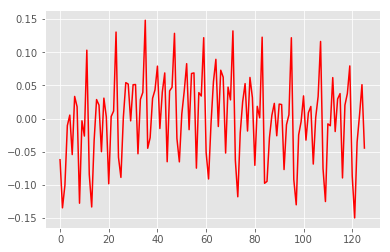

In [14]:
plt.plot(X,log_sales-y_fit,'r',label='inflation removed data')

- Problem 3  

$$X_{t}=w_{t-1}+2w_{t}+w_{t+1}$$
We have $$E[X_{t}]=0$$  
1. Autocovariance Function  
$$
\begin{align}
\gamma(0)&=\gamma(t,t)=Cov(X_{t},X_{t})=E[(w_{t-1}+2w_{t}+w_{t+1})^{2}]\\
&=E[w_{t-1}^{2}+2w_{t-1}w_{t}+w_{t-1}w_{t+1}+2w_{t}w_{t-1}+4w_{t}^{2}+2w_{t}w_{t+1}+w_{t+1}w_{t-1}+2w_{t}w_{t+1}+w_{t+1}^{2}]\\
&=6\sigma_{w}^{2}
\end{align}
$$
Similarly we can calculate
$$
\begin{align}
\gamma(1)&=\gamma(t,t+1)=Cov(X_{t},X_{t+1})=E[(w_{t-1}+2w_{t}+w_{t+1})(w_{t}+2w_{t+1}+w_{t+2})]\\
&=E[2w_{t}^{2}+2w_{t+1}^2]\\
&=4\sigma_{w}^{2}
\end{align}
$$
$$
\begin{align}
\gamma(2)&=\gamma(t,t+2)=Cov(X_{t},X_{t+2})=E[(w_{t-1}+2w_{t}+w_{t+1})(w_{t+1}+2w_{t+2}+w_{t+3})]\\
&=E[w_{t+1}^2]\\
&=\sigma_{w}^{2}
\end{align}
$$
And for $h>=3$, we have
$$
\begin{align}
\gamma(h)&=\gamma(t,t+h)=Cov(X_{t},X_{t+h})=E[(w_{t-1}+2w_{t}+w_{t+1})(w_{t+h-1}+2w_{t+h}+w_{t+h+1})]\\
&=0
\end{align}
$$
2. Autocorrelation Function  
$$\rho(h)=\frac{\gamma(h)}{\gamma(0)}$$
So we have 
$$\begin{align}
\rho(0)&=\frac{\gamma(0)}{\gamma(0)}=1\\
\rho(1)&=\frac{\gamma(1)}{\gamma(0)}=\frac{2}{3}\\
\rho(2)&=\frac{\gamma(2)}{\gamma(0)}=\frac{1}{6}
\end{align}$$
For $h>=3$, we have 
$$ \rho(h)=\frac{\gamma(h)}{\gamma(0)}=0$$

- Problem 4  
We have $E[Z_{t}]=0$ and $Var(Z_{t})=\sigma^{2}$

1. $X_{t} = a + bZ_{t} + cZ_{t-1}$   
$$E[X_{t}]=E[a + bZ_{t} + cZ_{t-1}]=a$$
The autocovariance function is:
For lag 0  
$$
\begin{align}
\gamma(0)&=E[(X_{t}-a)^{2}]=E[(bZ_{t} + cZ_{t-1})^{2}]\\
&=E[b^{2}Z_{t}^{2}+c^{2}Z_{t-1}^{2}+2bcZ_{t}Z_{t-1}]\\
&=(b^{2}+c^{2})\sigma^{2}
\end{align}
$$
For lag 1
$$
\begin{align}
\gamma(1)&=E[(X_{t}-a)(X_{t+1}-a)]=E[(bZ_{t} + cZ_{t-1})(bZ_{t+1} + cZ_{t})]\\
&=E[bcZ_{t}^{2}]\\
&=bc\sigma^{2}
\end{align}
$$
For lag h >=2:
$$
\begin{align}
\gamma(h)&=E[(X_{t}-a)(X_{t+h}-a)]=E[(bZ_{t} + cZ_{t-1})(bZ_{t+h} + cZ_{t+h-1})]\\
&=0
\end{align}
$$
So it is a stationary process

2. $X_{t} = Z_{1} cos(ct) + Z_{2} sin(ct)$
We have $$E[X_{t}]=E[Z_{1} cos(ct) + Z_{2} sin(ct)]=0$$
The autocovariance function is:
For lag h
$$
\begin{align}
\gamma(h)&=Cov(X_{t}X_{t+h})\\
&=E[ (Z_{1} cos(ct) + Z_{2} sin(ct))(Z_{1} cos(c(t+h)) + Z_{2} sin(c(t+h)))  ]\\
&=E[Z_{1}^{2}cos(ct)cos(c(t+h))]+E[Z_{1}Z_{2}cos(ct)sin(c(t+h))]+E[Z_{1}Z_{2}sin(ct)cos(c(t+h))]+E[Z_{2}^{2}sin(ct) sin(c(t+h))  ]\\
&=E[Z_{1}^{2}cos(ct)cos(c(t+h))]+E[Z_{2}^{2}sin(ct) sin(c(t+h))  ]\\
&=\sigma^{2}cos(ch)
\end{align}
$$
The mean and autocovariance are independent of time, so it is a stationary process.
3. $X_{t} = Z_{0} cos(ct)$
We have $$E[X_{t}]=E[ Z_{0} cos(ct)]=0$$
The autocovariance function is:
For lag h
$$
\begin{align}
\gamma(h)&=Cov(X_{t}X_{t+h})\\
&=E[ (Z_{0} cos(ct))(Z_{0} cos(c(t+h)))  ]\\
&=E[Z_{0}^{2}cos(ct)cos(c(t+h))  ]\\
&=E[Z_{0}^{2} cos(\frac{2ct+ch+ch}{2}cos(\frac{2ct+ch-ch}{2})  ]\\
&=\frac{\sigma^{2}}{2}(cos(2ct+ch)+cos(ch))
\end{align}
$$
The autocovariance is independent of time if $c=a*2\pi$, where a is a constant. And in this condition, X is a stationary process.
4. $X_{t} = Z_{t}Z_{t-1}$
We have $$E[X_{t}]=E[ Z_{t}Z_{t-1}]=0$$
The autocovariance function is:
For lag 0, we have
$$
\begin{align}
\gamma(0)&=E[(Z_{t}Z_{t-1})^{2}]\\
&=\sigma^{4}
\end{align}
$$
For other lag h, we have $\gamma(h)=0$. So this process is stationary.
5. $X_{t} = a + bZ_{t} + ct$  
We have $$E[X_{t}]=E[ a + bZ_{t} + ct]=a + ct$$
So the mean is dependend on time, so this process is not stationary.